In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 
import IS as isfn

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [3]:
# Create 
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
reglist = sorted(glob.glob('*rigid*'))
coordlist = sorted(glob.glob('*realcoord*'))

## Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

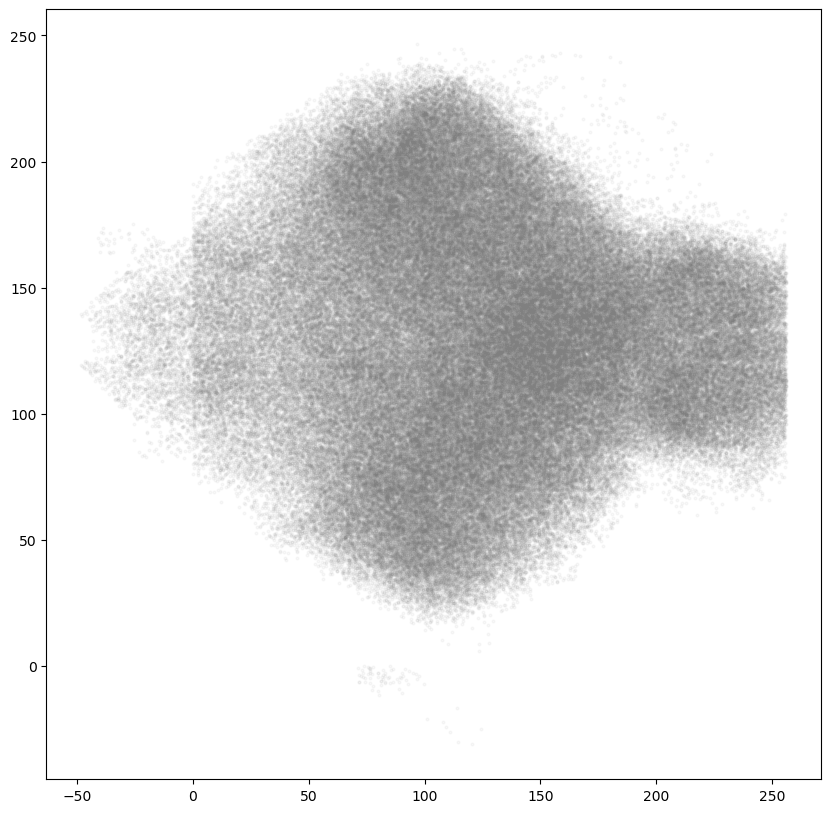

8990


In [86]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.05)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [87]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


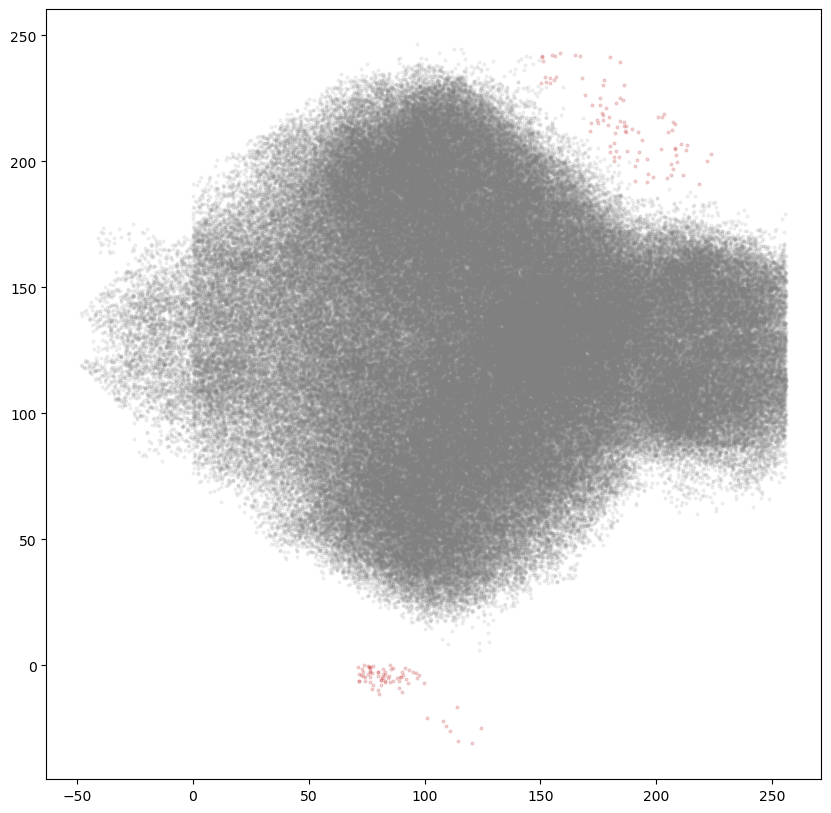

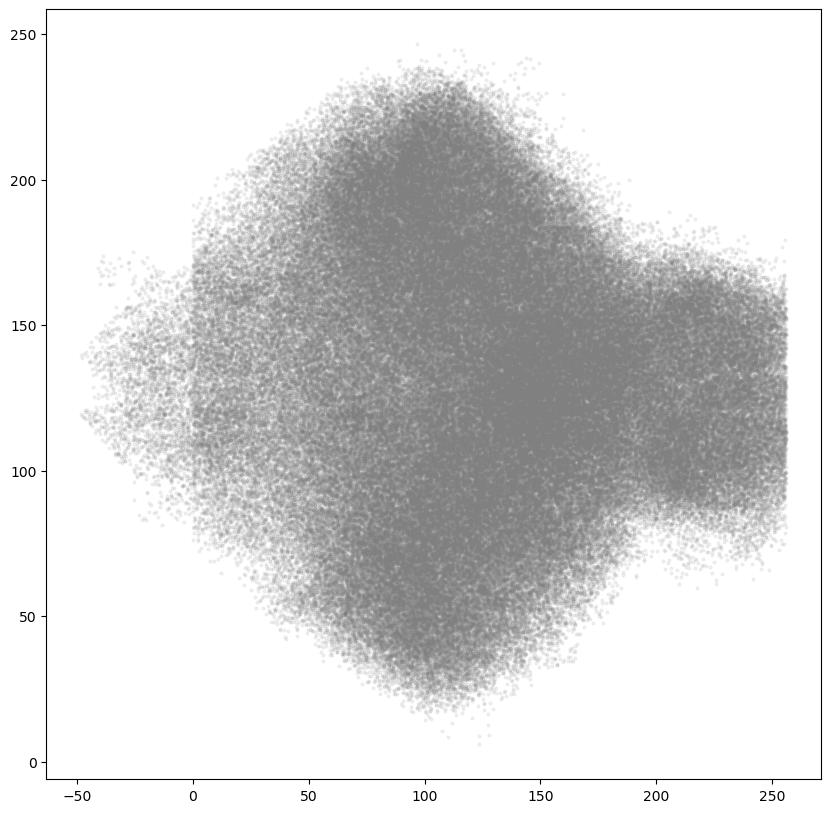

8990


In [88]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [94]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

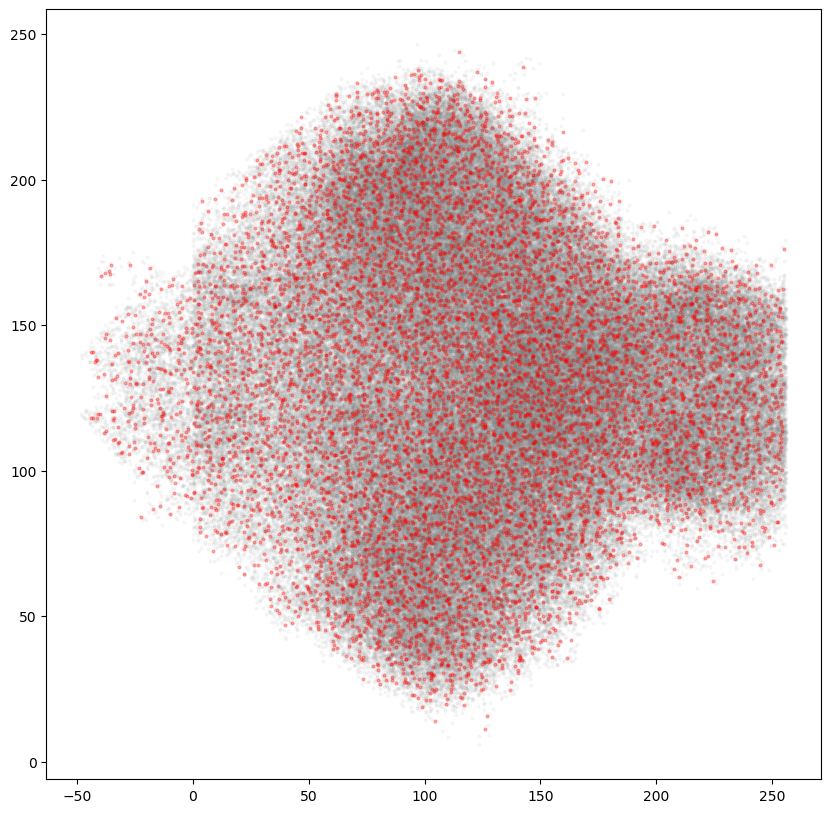

In [97]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Network models
* 10000 networks 
* 1000 simulations per network (100 simulations at each s parameter (10x?) per network)
* 10,000,000 simulations

### Parameters:
* k (edge + cycle density) = 10,000 k values (within range)
* s (propagation probability) = 10x? per network

### Parameter combinations:
* edge density - 10 edge deciles (1000 networks per edge decile)
* cycle density - 10 cycle deciles (for each edge decile, 100 networks per cycle decile)
* propagation probability - 10? probabilities per network - 10 pp deciles per cycle-edge decile combination
* concatenate each cycle-edge decile together

### Build small world networks (k)

1. Build small world network - Watts-Strogatz - define k connected neighbours 
- 10000x random k (within range) 
2. Change edges with certain probability (from our data?) to a random edge

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy

# Create 
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
node = sorted(glob.glob('knodes*'))
node

['knodes-coords.npy']

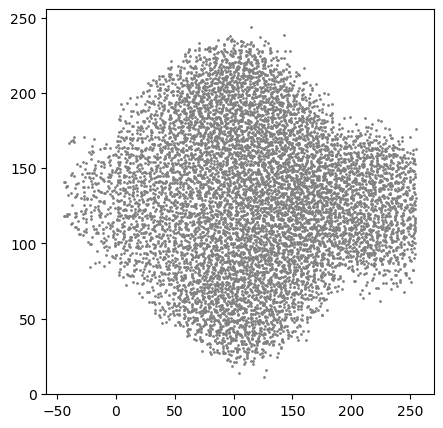

In [7]:
fig,axarr = plt.subplots(figsize = (5,5))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 1)
plt.show()

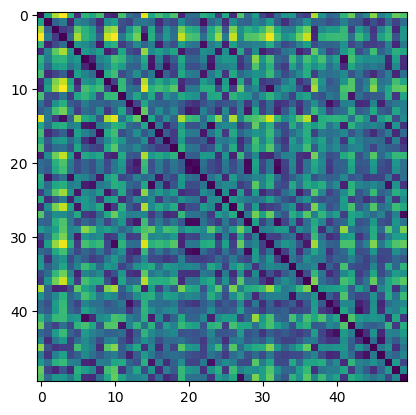

In [27]:
Nnodes    = 50
coords = np.random.rand(Nnodes, 2)
dist = euclidean_distances(coords)

plt.imshow(dist)
plt.show()

In [69]:
#Parameters
distance_matrix = dist
edge_density = 0.2
p = 0.1 

In [70]:
k_neighbours  = int(Nnodes * edge_density)
A  = np.zeros(dist.shape)

#if k_neighbours == 0: 
#    return A
  
# Loop through rows of distance matrix to find k_neighbours
#-----------------------------------------------------------------------------
for row in range(dist.shape[0]):
    neighbours = dist[row,].argsort()[:k_neighbours+1][::-1] #find neighbours 
    A[row,neighbours[:-1]] = 1 #make all edges connected in network

In [100]:
A, old_A = watts_strogatz(dist, edge_density = 0.1, p=0.2)

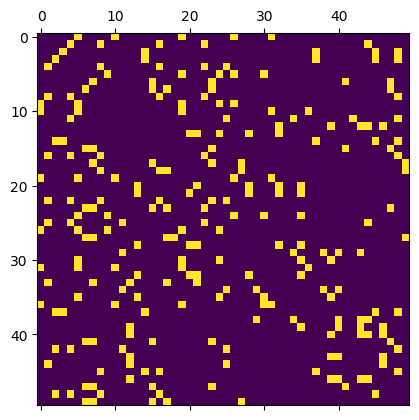

In [101]:
plt.matshow(A)
plt.show()

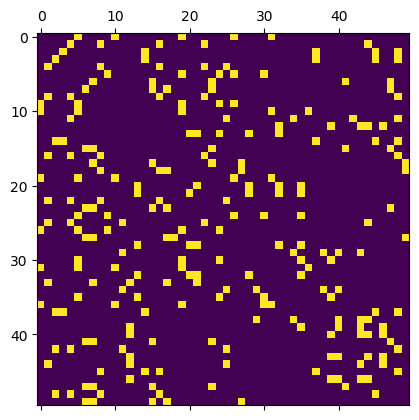

In [102]:
plt.matshow(old_A)
plt.show()

In [96]:
np.sum(A)

1250.0

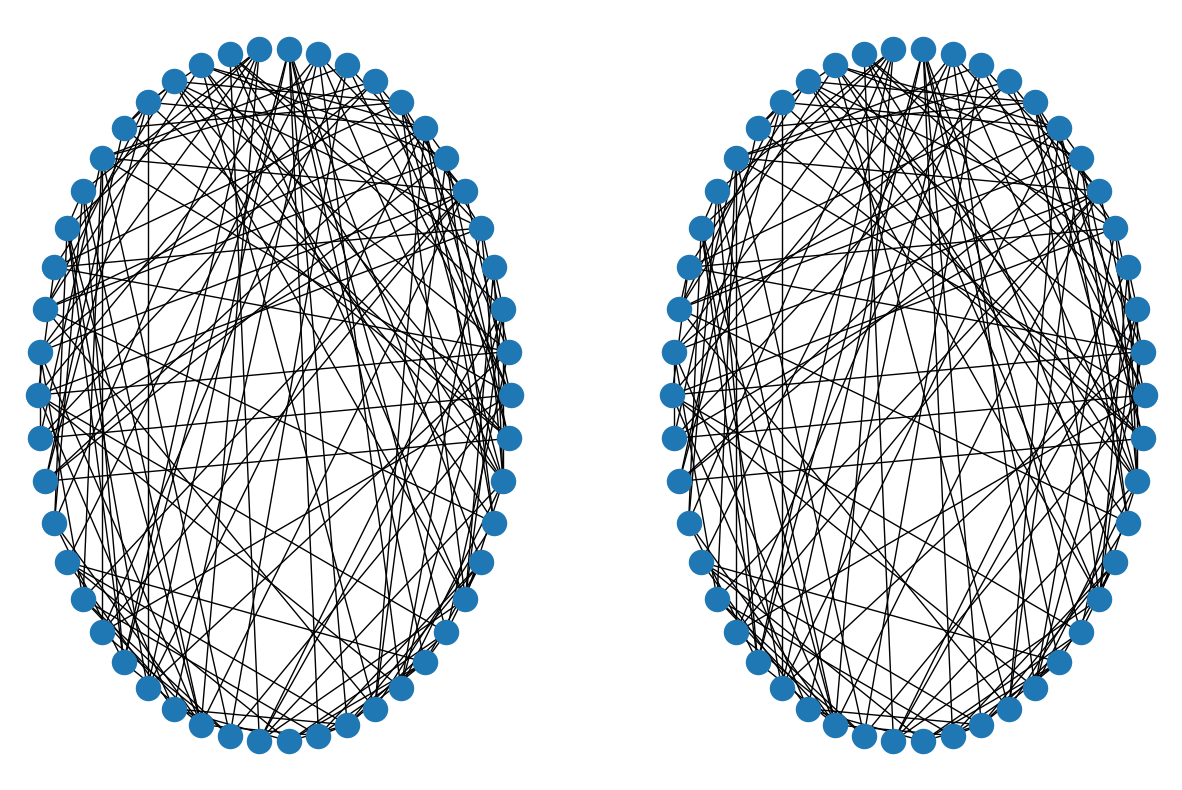

In [107]:
G = nx.from_numpy_array(A)
oG = nx.from_numpy_array(old_A)
fig,ax = plt.subplots(1,2, figsize=(15,10))
nx.draw_circular(oG, ax=ax[0] )
nx.draw_circular(G, ax=ax[1])
plt.show()

In [83]:
#===============================================================================
# Generate random small world graph with specific Edge density 
#===============================================================================
# Here I'm choosing the Watts-Strogatz model that has (i) a small average 
# shortest path length, and (ii) a large clustering coefficient

def watts_strogatz(distance_matrix, edge_density = 0.2, p = 0.1):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import networkx as nx
    from sklearn.metrics.pairwise import euclidean_distances
    import copy
    
    k_neighbours  = int(Nnodes * edge_density)
    A  = np.zeros(dist.shape)

    if k_neighbours == 0: 
        return A

    # Loop through rows of distance matrix to find k_neighbours
    #-----------------------------------------------------------------------------
    for row in range(dist.shape[0]):
        neighbours = dist[row,].argsort()[:k_neighbours+1][::-1] #find neighbours 
        A[row,neighbours[:-1]] = 1 #make all edges connected in network
        
        
    # Rewire connections with certain probability
    #-----------------------------------------------------------------------------
    [rows, cols]    = np.where(np.triu(A)) #Why make triangular - matrix shouldnt be symmetrical in connections?
    probs           = np.random.uniform(size = rows.shape[0]) #Generate random values 
    edges_to_change = np.where(probs <= p)[0] #see which values are randomly changed
    old_A           = copy.deepcopy(A) #create copy of A

    for e in range(edges_to_change.shape[0]): #Loop through edges to change
        this_edge = edges_to_change[e]
        not_done = True

    while not_done:
        A[rows[this_edge], cols[this_edge]] = 0         # switch off old edge
        A[cols[this_edge], rows[this_edge]] = 0

        [newr,newc] = np.random.randint(0,A.shape[0],2) #Randomly generate new coordinates
        if A[newr,newc] == 0:                           #If not connected - then connect
            A[newr,newc] = 1
            A[newc,newr] = 1
            not_done = False
    return A, old_A

### Edge density
1. Calculate edge density for each k 
2. Construct edge density distribution - bin into edge value deciles

### Cycle density
1. Calculate cycle density for each k
2. For each edge decile group - build a cycle distribution decile - 10 bins in each edge decile - 100 graphs per bin 

### Simulate avalanches (propagation probability - i.e. BR) 
* change node excitability in the network - scale exponential distance-connectivity curve - 10 different?
1. 10 scaling parameters per network
2. 10 simulations, per scaling parameter, per network - ping 10 random nodes
3. save output
4. For each cycle-edge decile (100 networks) - build 10 pp deciles

In [ ]:
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x, s=1):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, s):
  edgeweights = np.exp(s/2)*sig(np.exp(-0.07/np.exp(s)*distance))/3
  return edgeweights

# Calculate and plot in a loop with s increasing from 0 to 2
#===============================================================================
Nsteps  = 20
svals   = np.linspace(0, 3, Nsteps)
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))

distance = np.linspace(0, 300, 3000)
for s in range(len(svals)):
  ax.plot(distance, dist2edge(distance, svals[s]), c=colors[s])

fig.show()


### Fit data
1. For each edge decile-cycle decile combination - concatenate all avalanche simulations into 1 distribution
2. Plot as pdf
3. Empirical distribution - concatenate together, or use fish that minimises ks distance to mean distribution
4. Which parameters minimise ks distance to empirical baseline + ptz data
5. Compare parameters

In [ ]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
steps = 10

allfcyclist = list(range(len(kcoord)))
for y in range(len(kcoord)):
    trace = np.load(ktrace[y])
    cyclist = list(range(steps))
    index = 0
    for cutoff in range(1, steps+1):

        # Network construction
        #=====================================================================
        # Calculate correlation coefficient
        #---------------------------------------------------------------------
        A = np.corrcoef(trace) #correlation matrix of ktraces
        np.fill_diagonal(A, 0) #fills diagonal with 0s (removes self correlation)
    
        # Z-score and binarise according to z cut off
        #---------------------------------------------------------------------
        # A  = stats.zscore(np.ravel(A)).reshape(A.shape)
        bA = A > (cutoff / 10)
    
        # Generate Network x object GRAPH
        #---------------------------------------------------------------------
        G = nx.from_numpy_matrix(bA) #generates graph connected edges between nodes only above threshold correlation

        # Calculate cycle density
        #=====================================================================
        cycs = nx.algorithms.cycle_basis(G) #returns list of complete cycles in data
        no_E = G.number_of_edges() #how many edges in network
        if no_E > 0: ncd = len(nx.algorithms.cycle_basis(G)) / no_E
        else:        ncd = 0
        
        cyclist[index] = ncd
        index+=1
    allfcyclist[y] = cyclist
    

In [ ]:
swp = np.zeros((3,10))
ai  = 0
for a in arange:
    swp[0,ai] = np.mean(a[0:9])
    swp[1,ai] = np.mean(a[10:19])
    swp[2,ai] = np.mean(a[20:])
        
    ai = ai + 1

In [ ]:
plt.plot(np.transpose(swp))